In [1]:
import sys
sys.path.append('..')

In [2]:
from jaxmetalog import NegativeLogMetalog

from statsmodels.distributions.empirical_distribution import ECDF


import jax
import jax.numpy as jnp

import matplotlib.pyplot as plt

In [11]:
key = jax.random.PRNGKey(30091985)
key, sub = jax.random.split(key)
data = jax.random.truncated_normal(sub, -jnp.inf, 5, shape=(1000, ))

In [13]:
dist = NegativeLogMetalog(20, learning_rate=0.001, )
dist.fit(data)

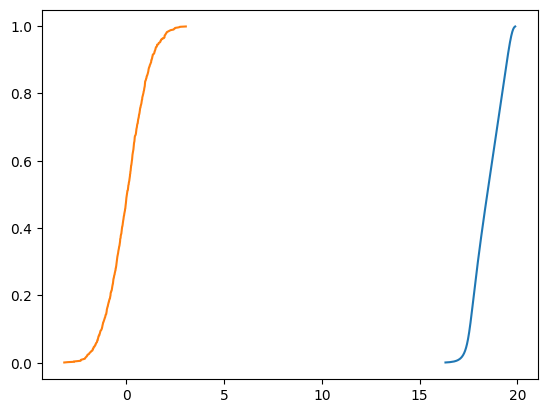

In [14]:
x_hat, y = dist.ppf(data)
plt.plot(x_hat, y)

ecdf = ECDF(data)
xe = jnp.array(ecdf.x[1:-1])
ye = jnp.array(ecdf.y[1:-1])
plt.plot(xe, ye)

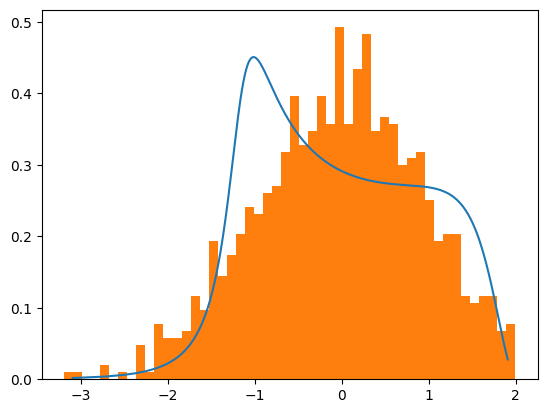

In [7]:
plt.plot(x_hat, dist.pdf(data))
plt.hist(data, density=True, bins=50);

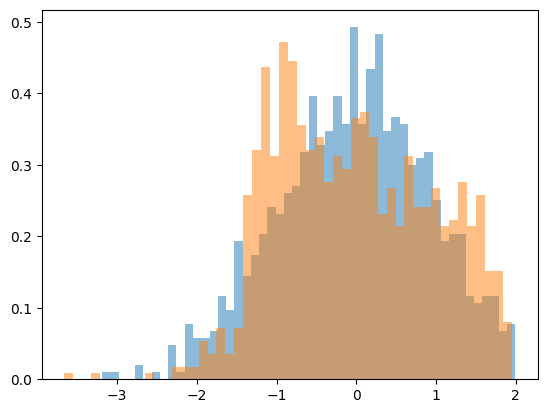

In [8]:
key, sub = jax.random.split(key)
sample = dist.sample(key, 1000)
plt.hist(data, density=True, bins=50, alpha=0.5);
plt.hist(sample, density=True, bins=50, alpha=0.5);